# Iris MVP

> Oi amigo, esse caderno é para treinar uma rede neural básica no dataset iris! :)

### Parâmetros

In [97]:
random_seed = 42
my_class = 'versicolor'
my_cols = ['petallength', 'petalwidth']
validation_size = 0.2
learning_rate = 0.01
my_loss = 'mse'
my_metric = 'accuracy'
my_patience = 200
max_epochs = 2000

### Imports

In [98]:
import itertools
import pathlib

import keras
import numpy
import pandas
from matplotlib import pyplot
from seaborn import kdeplot, pairplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

keras.utils.set_random_seed(random_seed)

### Data Understanding / Preparation

In [99]:
x_cols = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
y_col = 'flower'

In [100]:
# BUILD PATH TO DATA USING PATHLIB
this_folder = pathlib.Path.cwd()
data_folder = this_folder.parent
path_to_iris = data_folder / 'datasets' / 'iris.data'
iris = pandas.read_csv(path_to_iris, sep=',', decimal='.')
iris.flower = [x[1] for x in iris.flower.str.split('-')]
iris['y'] = [1 if x == my_class else 0 for x in iris.flower]

iris

,sepallength,sepalwidth,petallength,petalwidth,flower,y
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


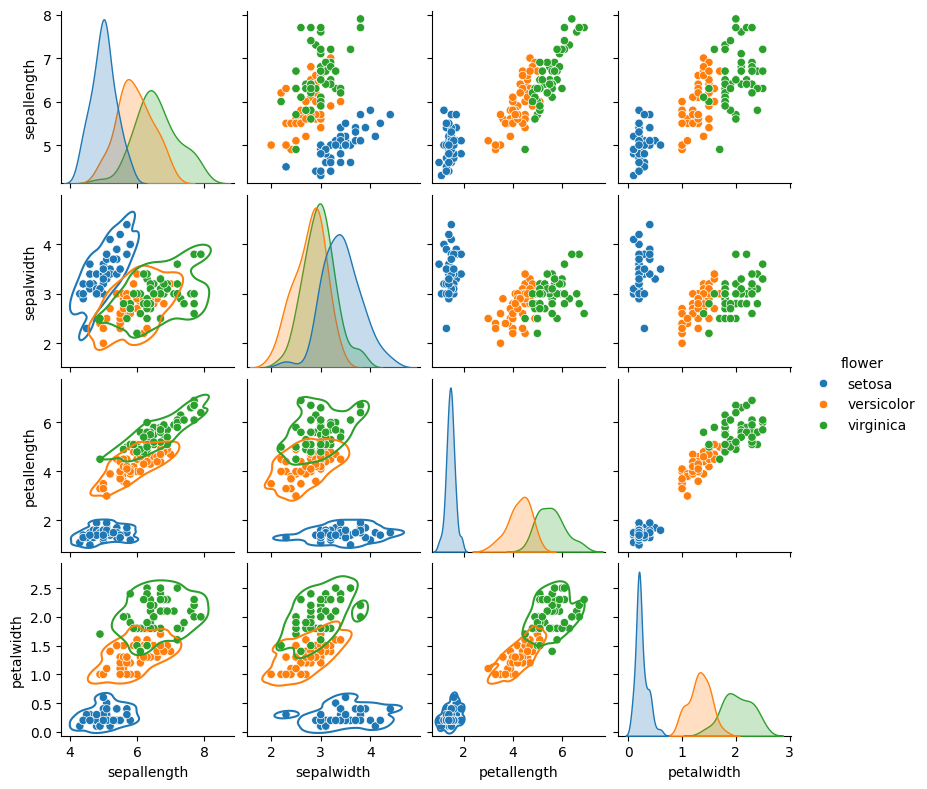

In [101]:
g = pairplot(iris[x_cols + ['flower']], hue='flower', height=2.0, diag_kind='kde')
_ = g.map_lower(kdeplot, levels=1, color=".2")

### Data Preparation - Separar Treino e Validação

In [102]:
X = iris[my_cols]
y = iris['y'].to_numpy()
X_scaled = StandardScaler().fit_transform(X)

### Modeling - Construir a Rede

In [103]:
input_layer = keras.Input(shape=(2,))
hidden = keras.layers.Dense(3, activation='tanh')(input_layer)
output_layer = keras.layers.Dense(1, activation='sigmoid')(hidden)
logistic_nn = keras.Model(inputs=input_layer, outputs=output_layer)
logistic_nn.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

### sigmoid(a1x1 + a2x2 + a0)

In [104]:
logistic_nn.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
                    loss=my_loss,
                    metrics=[my_metric])
es_loss_val = keras.callbacks.EarlyStopping(monitor=f'val_loss', mode='min', patience=my_patience, restore_best_weights=True)
# es_metric_train = keras.callbacks.EarlyStopping(monitor=my_metric, mode='max', patience=my_patience)
history = logistic_nn.fit(X_scaled, y, batch_size=X_scaled.shape[0], epochs=max_epochs, validation_split=validation_size, verbose="auto", callbacks=[es_loss_val])

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step - accuracy: 0.7500 - loss: 0.1944 - val_accuracy: 0.0000e+00 - val_loss: 0.5867
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7500 - loss: 0.1912 - val_accuracy: 0.0000e+00 - val_loss: 0.5969
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.7500 - loss: 0.1890 - val_accuracy: 0.0000e+00 - val_loss: 0.5903
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.7500 - loss: 0.1872 - val_accuracy: 0.0000e+00 - val_loss: 0.5880
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.7500 - loss: 0.1855 - val_accuracy: 0.0000e+00 - val_loss: 0.5821
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.7500 - loss: 0.1839 - val_accuracy: 0.0000e+00 - val_loss: 0.5768
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7500 - loss: 0.1824 - val_accuracy: 0.0000e+00 - val_loss: 0.5713
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.7583 - los

### Convergência da Rede - Loss vs Val Loss

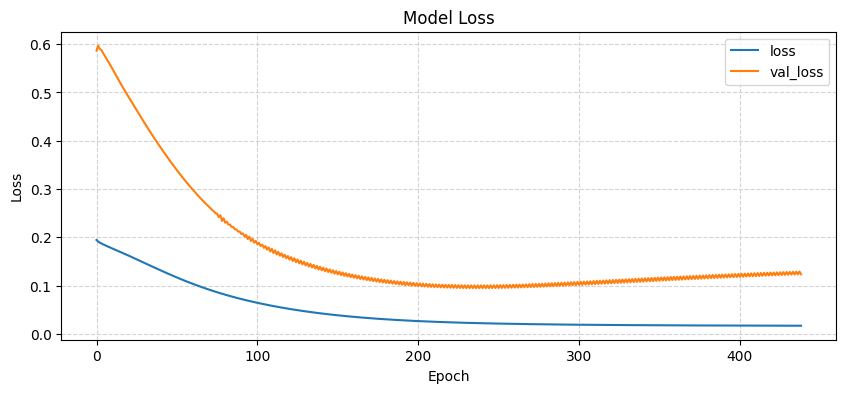

In [105]:
fig = pyplot.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.set_title('Model Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
_ = ax.legend()
ax.grid(which='both', color='lightgray', linestyle='--')

In [106]:
# CLASS COLOR GRID & CLASS EVALUATION
grid_n_points = 100
class_threshold = 0.5
little_delta = 0.1

In [107]:
x0_grid = numpy.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), grid_n_points)
x1_grid = numpy.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), grid_n_points)
x1_grid = numpy.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), grid_n_points)
X_g = numpy.array(list(itertools.product(x0_grid, x1_grid)))
Y_g = logistic_nn.predict(X_g)
Y_est = (logistic_nn.predict(X_scaled) > class_threshold).astype(int)
t_error, t_precision = logistic_nn.evaluate(X_scaled, y, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


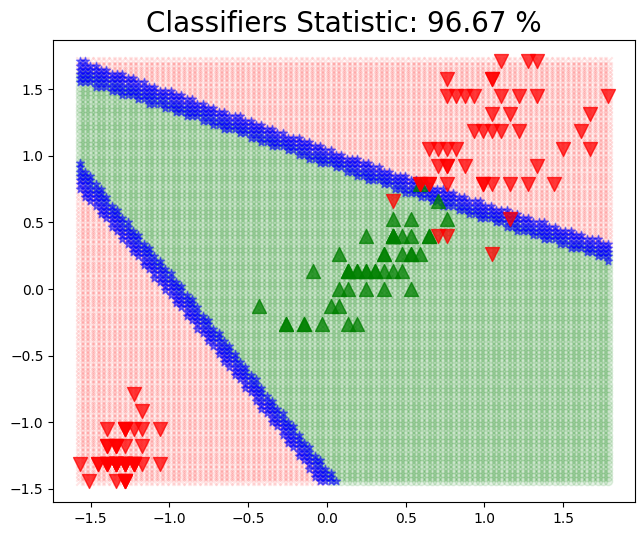

In [109]:
# CLASSIFICATION FIGURE
fig = pyplot.figure(figsize=(7.5, 6.0))
ax = fig.add_subplot(111)
# PLOT CLASS REGION
ix_class_region = Y_g.reshape(-1) > class_threshold
ix_class_points = y.reshape(-1) == 1
ix_surface = (Y_g.reshape(-1) >= class_threshold - little_delta) &  (Y_g.reshape(-1) <= class_threshold + little_delta)
_ = ax.scatter(X_g[ix_class_region, 0], X_g[ix_class_region, 1], marker='o', color='green', alpha=0.1)
_ = ax.scatter(X_g[~ix_class_region, 0], X_g[~ix_class_region, 1], marker='x', color='red', alpha=0.1)
_ = ax.scatter(X_g[ix_surface, 0], X_g[ix_surface, 1], marker='*', color='blue', alpha=0.5)
_ = ax.scatter(X_scaled[ix_class_points, 0], X_scaled[ix_class_points, 1], marker='^', color='green', alpha=0.75, s=100)
_ = ax.scatter(X_scaled[~ix_class_points, 0], X_scaled[~ix_class_points, 1], marker='v', color='red', alpha=0.75, s=100)
_ = ax.set_title('Classifiers {}: {:.2f} %'.format('Statistic', 100*t_precision), size=20)